In [2]:
!curl https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip -o data.zip
!unzip data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111k  100  111k    0     0  12141      0  0:00:09  0:00:09 --:--:-- 30463
Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/file_information.csv  
  inflating: __MACOSX/data/._file_information.csv  
  inflating: data/g0pA_taska.txt     
  inflating: __MACOSX/data/._g0pA_taska.txt  
  inflating: data/g0pA_taskb.txt     
  inflating: __MACOSX/data/._g0pA_taskb.txt  
  inflating: data/g0pA_taskc.txt     
  inflating: __MACOSX/data/._g0pA_taskc.txt  
  inflating: data/g0pA_taskd.txt     
  inflating: __MACOSX/data/._g0pA_taskd.txt  
  inflating: data/g0pA_taske.txt     
  inflating: __MACOSX/data/._g0pA_taske.txt  
  inflating: data/g0pB_taska.txt     
  inflating: __MACOSX/data/._g0pB_taska.txt 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os

In [2]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first few rows of data info
plagiarism_df.head(10)

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
5,g0pB_taska.txt,a,non
6,g0pB_taskb.txt,b,non
7,g0pB_taskc.txt,c,cut
8,g0pB_taskd.txt,d,light
9,g0pB_taske.txt,e,heavy


In [3]:
# print out some stats about the data
print('Number of files: ', plagiarism_df.shape[0])  # .shape[0] gives the rows 
# .unique() gives unique items in a specified column
print('Number of unique tasks/question types (A-E): ', (len(plagiarism_df['Task'].unique())))
print('Unique plagiarism categories: ', (plagiarism_df['Category'].unique()))

Number of files:  100
Number of unique tasks/question types (A-E):  5
Unique plagiarism categories:  ['non' 'cut' 'light' 'heavy' 'orig']


In [4]:
# Show counts by different tasks and amounts of plagiarism

# group and count by task
counts_per_task=plagiarism_df.groupby(['Task']).size().reset_index(name="Counts")
print("\nTask:")
display(counts_per_task)

# group by plagiarism level
counts_per_category=plagiarism_df.groupby(['Category']).size().reset_index(name="Counts")
print("\nPlagiarism Levels:")
display(counts_per_category)

# group by task AND plagiarism level
counts_task_and_plagiarism=plagiarism_df.groupby(['Task', 'Category']).size().reset_index(name="Counts")
print("\nTask & Plagiarism Level Combos :")
display(counts_task_and_plagiarism)


Task:


,Task,Counts
0,a,20
1,b,20
2,c,20
3,d,20
4,e,20



Plagiarism Levels:


,Category,Counts
0,cut,19
1,heavy,19
2,light,19
3,non,38
4,orig,5



Task & Plagiarism Level Combos :


,Task,Category,Counts
0,a,cut,4
1,a,heavy,3
2,a,light,3
3,a,non,9
4,a,orig,1
5,b,cut,3
6,b,heavy,4
7,b,light,3
8,b,non,9
9,b,orig,1


<BarContainer object of 25 artists>

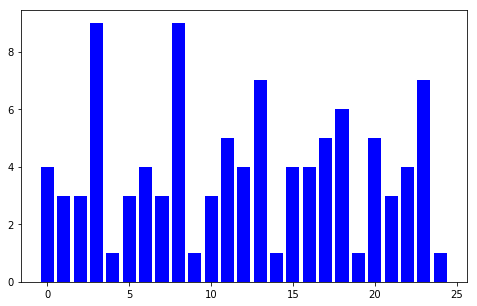

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

# counts
group = ['Task', 'Category']
counts = plagiarism_df.groupby(group).size().reset_index(name="Counts")

plt.figure(figsize=(8,5))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')

In [6]:
# Read in a csv file and return a transformed dataframe
def numerical_dataframe(csv_file='data/file_information.csv'):
    '''Reads in a csv file which is assumed to have `File`, `Category` and `Task` columns.
       This function does two things: 
       1) converts `Category` column values to numerical values 
       2) Adds a new, numerical `Class` label column.
       The `Class` column will label plagiarized answers as 1 and non-plagiarized as 0.
       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with numerical categories and a new `Class` label column'''
    
    new_labels = {
        "non":0,
        "heavy":1,
        "light":2,
        "cut":3,
        "orig":-1
    }
    df = pd.read_csv(csv_file)
    df['Category'] = df['Category'].apply(lambda x: new_labels[x])
    
    def classify(category: int) -> int:
        """
        Classifies the category as either plagiarised or not or original
        
        Classes are:
        -1 -> original [-1]
        0 -> Not plagiarised [0]
        1,2, 3 -> Plagiarised [1]
        
        Parameters
        ----------
        category: the category to classify
        
        Returns
        -------
        The class of the category
        """
        if category > 0:
            return 1
        return category
    
    df['Class'] = df['Category'].apply(classify)
    return df


import re
# helper function for pre-processing text given a file
def process_file(file):
    # put text in all lower case letters 
    all_text = file.read().lower()

    # remove all non-alphanumeric chars
    all_text = re.sub(r"[^a-zA-Z0-9]", " ", all_text)
    # remove newlines/tabs, etc. so it's easier to match phrases, later
    all_text = re.sub(r"\t", " ", all_text)
    all_text = re.sub(r"\n", " ", all_text)
    all_text = re.sub("  ", " ", all_text)
    all_text = re.sub("   ", " ", all_text)
    
    return all_text


def create_text_column(df, file_directory='data/'):
    '''Reads in the files, listed in a df and returns that df with an additional column, `Text`. 
       :param df: A dataframe of file information including a column for `File`
       :param file_directory: the main directory where files are stored
       :return: A dataframe with processed text '''
   
    # create copy to modify
    text_df = df.copy()
    
    # store processed text
    text = []
    
    # for each file (row) in the df, read in the file 
    for row_i in df.index:
        filename = df.iloc[row_i]['File']
        #print(filename)
        file_path = file_directory + filename
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:

            # standardize text using helper function
            file_text = process_file(file)
            # append processed text to list
            text.append(file_text)
    
    # add column to the copied dataframe
    text_df['Text'] = text
    
    return text_df

In [7]:
# informal testing, print out the results of a called function
# create new `transformed_df`
transformed_df = numerical_dataframe(csv_file ='data/file_information.csv')

# check work
# check that all categories of plagiarism have a class label = 1
transformed_df.head(10)

,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0
5,g0pB_taska.txt,a,0,0
6,g0pB_taskb.txt,b,0,0
7,g0pB_taskc.txt,c,3,1
8,g0pB_taskd.txt,d,2,1
9,g0pB_taske.txt,e,1,1


In [8]:
text_df = create_text_column(transformed_df)
text_df.head()

,File,Task,Category,Class,Text
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...


In [9]:
# after running the cell above
# check out the processed text for a single file, by row index
row_idx = 0 # feel free to change this index

sample_text = text_df.iloc[0]['Text']

print('Sample processed text:\n\n', sample_text)

Sample processed text:

 inheritance is a basic concept of object oriented programming where the basic idea is to create new classes that add extra detail to existing classes this is done by allowing the new classes to reuse the methods and variables of the existing classes and new methods and classes are added to specialise the new class inheritance models the is kind of relationship between entities or objects  for example postgraduates and undergraduates are both kinds of student this kind of relationship can be visualised as a tree structure where student would be the more general root node and both postgraduate and undergraduate would be more specialised extensions of the student node or the child nodes  in this relationship student would be known as the superclass or parent class whereas  postgraduate would be known as the subclass or child class because the postgraduate class extends the student class  inheritance can occur on several layers where if visualised would display a l

In [10]:
import operator

# Use function to label datatype for training 1 or test 2 
def create_datatype(df, train_value, test_value, datatype_var, compare_dfcolumn, operator_of_compare, value_of_compare,
                    sampling_number, sampling_seed):
    # Subsets dataframe by condition relating to statement built from:
    # 'compare_dfcolumn' 'operator_of_compare' 'value_of_compare'
    df_subset = df[operator_of_compare(df[compare_dfcolumn], value_of_compare)]
    df_subset = df_subset.drop(columns = [datatype_var])
    
    # Prints counts by task and compare_dfcolumn for subset df
    #print("\nCounts by Task & " + compare_dfcolumn + ":\n", df_subset.groupby(['Task', compare_dfcolumn]).size().reset_index(name="Counts") )
    
    # Sets all datatype to value for training for df_subset
    df_subset.loc[:, datatype_var] = train_value
    
    # Performs stratified random sample of subset dataframe to create new df with subset values 
    df_sampled = df_subset.groupby(['Task', compare_dfcolumn], group_keys=False).apply(lambda x: x.sample(min(len(x), sampling_number), random_state = sampling_seed))
    df_sampled = df_sampled.drop(columns = [datatype_var])
    # Sets all datatype to value for test_value for df_sampled
    df_sampled.loc[:, datatype_var] = test_value
    
    # Prints counts by compare_dfcolumn for selected sample
    #print("\nCounts by "+ compare_dfcolumn + ":\n", df_sampled.groupby([compare_dfcolumn]).size().reset_index(name="Counts") )
    #print("\nSampled DF:\n",df_sampled)
    
    # Labels all datatype_var column as train_value which will be overwritten to 
    # test_value in next for loop for all test cases chosen with stratified sample
    for index in df_sampled.index: 
        # Labels all datatype_var columns with test_value for straified test sample
        df_subset.loc[index, datatype_var] = test_value

    #print("\nSubset DF:\n",df_subset)
    # Adds test_value and train_value for all relevant data in main dataframe
    for index in df_subset.index:
        # Labels all datatype_var columns in df with train_value/test_value based upon 
        # stratified test sample and subset of df
        df.loc[index, datatype_var] = df_subset.loc[index, datatype_var]

    # returns nothing because dataframe df already altered 
    

def train_test_dataframe(clean_df, random_seed=100):
    
    new_df = clean_df.copy()

    # Initialize datatype as 0 initially for all records - after function 0 will remain only for original wiki answers
    new_df.loc[:,'Datatype'] = 0

    # Creates test & training datatypes for plagiarized answers (1,2,3)
    create_datatype(new_df, 1, 2, 'Datatype', 'Category', operator.gt, 0, 1, random_seed)

    # Creates test & training datatypes for NON-plagiarized answers (0)
    create_datatype(new_df, 1, 2, 'Datatype', 'Category', operator.eq, 0, 2, random_seed)
    
    # creating a dictionary of categorical:numerical mappings for plagiarsm categories
    mapping = {0:'orig', 1:'train', 2:'test'} 

    # traversing through dataframe and replacing categorical data
    new_df.Datatype = [mapping[item] for item in new_df.Datatype] 

    return new_df

In [11]:
random_seed = 1  # can change; set for reproducibility

complete_df = train_test_dataframe(text_df, random_seed=random_seed)

# check results
complete_df.head(10)

,File,Task,Category,Class,Text,Datatype
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...,train
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...,test
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...,train
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...,train
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...,train
5,g0pB_taska.txt,a,0,0,inheritance is a basic concept in object orien...,train
6,g0pB_taskb.txt,b,0,0,pagerank pr refers to both the concept and the...,train
7,g0pB_taskc.txt,c,3,1,vector space model is an algebraic model for r...,test
8,g0pB_taskd.txt,d,2,1,bayes theorem relates the conditional and marg...,train
9,g0pB_taske.txt,e,1,1,dynamic programming is a method for solving ma...,test
